<a href="https://colab.research.google.com/github/ABBU2712/AIcrowd-Mission-Control/blob/main/Corrupted_Mars_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing AI-Crowd Client 

In [1]:
!pip install aicrowd-cli

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 204kB 15.2MB/s 
     |████████████████████████████████| 163kB 21.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 


In [2]:
API_KEY = "08882bea69d263e6f7532dca7d30840c"
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
!aicrowd dataset download --challenge image-correction -j 3

train.zip:   0% 0.00/1.59G [00:00<?, ?B/s]
sample_submission.zip:   0% 0.00/41.5M [00:00<?, ?B/s]

train.zip:   2% 33.6M/1.59G [00:04<03:06, 8.33MB/s]
sample_submission.zip:  81% 33.6M/41.5M [00:04<00:01, 7.10MB/s]
sample_submission.zip: 100% 41.5M/41.5M [00:04<00:00, 9.37MB/s]

sample_submission.zip: 100% 41.5M/41.5M [00:04<00:00, 8.39MB/s]

test.zip:  11% 33.6M/315M [00:04<00:41, 6.80MB/s]

train.zip:   4% 67.1M/1.59G [00:07<03:00, 8.43MB/s]

val.zip:  21% 33.6M/158M [00:02<00:09, 13.1MB/s]
test.zip:  21% 67.1M/315M [00:09<00:34, 7.17MB/s]

train.zip:   6% 101M/1.59G [00:11<02:51, 8.64MB/s] 

val.zip:  64% 101M/158M [00:06<00:03, 15.4MB/s] 
test.zip:  32% 101M/315M [00:12<00:28, 7.53MB/s] 

train.zip:   8% 134M/1.59G [00:14<02:39, 9.13MB/s]

val.zip: 100% 158M/158M [00:09<00:00, 17.5MB/s]

train.zip:  13% 201M/1.59G [00:21<02:24, 9.62MB/s]
train.zip:  15% 235M/1.59G [00:25<02:31, 8.94MB/s]
train.zip:  17% 268M/1.59G [00:28<02:18, 9.51MB/s]
train.zip:  21% 336M/1.59G [00:35<02:13, 9.3

In [4]:
!rm -rf data
!mkdir data


!unzip train.zip -d data/train >/dev/null
!unzip val.zip -d data/val >/dev/null
!unzip test.zip -d data/test >/dev/null
!unzip sample_submission.zip -d data/sample_submission >/dev/null

##Importing The Libraries

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from glob import glob
import random
from tqdm.notebook import tqdm 

In [6]:
data_directiory = "data"
test_data_path = os.path.join(data_directiory, "test/Corrupted_Images")
test_submission_path = "Labels"

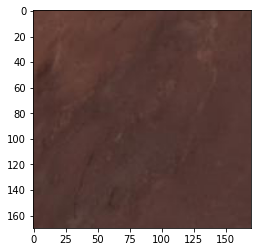

In [7]:
img = plt.imread(test_data_path+"/0/start_image.jpg")
plt.imshow(img)

##Training the model 

In [8]:
!rm -rf Labels
!mkdir Labels

In [9]:
# Output Image Width & hight
image_width, image_height = 512, 512

# Getting though corrupted images folder
for img_folder_name in tqdm(os.listdir(test_data_path)):

    # Getting all corrupted images name from the corrupted images folder
    img_folder_path = os.path.join(test_data_path, img_folder_name)

    # Creating a new blank image
    prediction = Image.new("RGBA",(image_width, image_height)) 

    # Groung though each corrupted image
    for _currupted_img_name in glob(os.path.join(img_folder_path, "*.jpg")):
        
        # Opening corrupted image
        currupted_im = Image.open(_currupted_img_name)
        pp_width, pp_height = currupted_im.size

        # Find Random location to paste the corrupted image into the blank image
        random_x = random.randint(0, image_width - pp_width)
        random_y = random.randint(0, image_height - pp_height)

        # pasting the corrupted image into the blank imagee
        prediction.paste(currupted_im, (random_x, random_y))

    # Saving the output image :)
    prediction.convert("RGB").save(os.path.join(test_submission_path, f"{img_folder_name}.jpg")) 

In [10]:
!zip submission.zip -r Labels > /dev/null

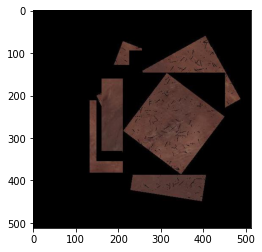

In [11]:
sample_output_img = plt.imread(os.path.join(test_submission_path, f"0.jpg"))
plt.imshow(sample_output_img)

In [12]:
!aicrowd submission create -c image-correction -f submission.zip

submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 125.8/125.8 MB • 2.6 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/image-correction/submissions/126905              │
│                  │                                                                                                         │
│  All submissions │ https://w